# CUSTOMER CHURN PREDICTION

Author - [Calvince Kaunda](https://github.com/CalvinceKaunda/CUSTOMER-PREDICTION-)

## 1. Business Understanding
The telecomminicatons field is an important sector in our lives though we may not be aware of this. Telecommunications companies are responsible for critical tasks that we may be taking for granted such as facilitating of phone calls and providing internet connectivity. Different companies in this industry offer different packages and services, hence a customer may choose to switch to a different company due to reasons such as budget, preference, or poor customer service.

### Problem statement
SyriaTel, is a telcommunications company facing churn; as is common in businesses, and are interested in reducing how much money is lost because of customers who do not stick around very long. To address this, they are interested in a machine learning model that can predict the likelihood of customer churn based on various customer characteristics and usage patterns.

## Objectives
- Identify factors that are likely to lead to customer churn
- Build a classifier to predict whether a customer will stop doing business with SyriaTel
- Provide actionable insights to retain customers who are more likely to Leave SyriaTel

## 2. Data Understanding
The dataset is from Kaggle, [Churn in Telecom's dataset](https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset?resource=download)

The dataset contains various attributes of a customer such as their phone number, state, type of plan, charges for specific plans, and whether they have churned, among other details. The churn column is our target and we would like to predict it based on other relevant attributes in the dataset

> ### 2.1 LOAD THE DATASET 
We read in the dataset to analyse it further and get a feel of it using some EDA

In [1]:
#import relevant libraries
import pandas as pd
df = pd.read_csv("SyriaTel Dataset.csv")

#view first few rows of dataset
df.head()

state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total day charge  ...  total eve calls  total eve charge  \
0             45.07  ...               99             16.78   
1             27.47  ...              103             16.62   
2             41.38  ...              110             10.30   
3             50.90  ...               88              5.26   
4             28.34  ...              122             12.61   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer service calls  churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False  

[5 rows x 21 columns]

>### 2.2 EXPLORATORY DATA  ANALYSIS
Explore the dataset further to uncover patterns, identify outliers, identify relationships between the variables and get a better data understanding before applying modeling

In [2]:
#shape of dataframe
print(f"Rows : {df.shape[0]} ")
print(f"Columns : {df.shape[1]}")

Rows : 3333 
Columns : 21


In [3]:
#general staistics of numerical colummns
df.describe()

account length    area code  number vmail messages  total day minutes  \
count     3333.000000  3333.000000            3333.000000        3333.000000   
mean       101.064806   437.182418               8.099010         179.775098   
std         39.822106    42.371290              13.688365          54.467389   
min          1.000000   408.000000               0.000000           0.000000   
25%         74.000000   408.000000               0.000000         143.700000   
50%        101.000000   415.000000               0.000000         179.400000   
75%        127.000000   510.000000              20.000000         216.400000   
max        243.000000   510.000000              51.000000         350.800000   

       total day calls  total day charge  total eve minutes  total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.069084          9.259435          50.713844        19.922625   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.430000         166.600000        87.000000   
50%         101.000000         30.500000         201.400000       100.000000   
75%         114.000000         36.790000         235.300000       114.000000   
max         165.000000         59.640000         363.700000       170.000000   

       total eve charge  total night minutes  total night calls  \
count       3333.000000          3333.000000        3333.000000   
mean          17.083540           200.872037         100.107711   
std            4.310668            50.573847          19.568609   
min            0.000000            23.200000          33.000000   
25%           14.160000           167.000000          87.000000   
50%           17.120000           201.200000         100.000000   
75%           20.000000           235.300000         113.000000   
max           30.910000           395.000000         175.000000   

       total night charge  total intl minutes  total intl calls  \
count         3333.000000         3333.000000       3333.000000   
mean             9.039325           10.237294          4.479448   
std              2.275873            2.791840          2.461214   
min              1.040000            0.000000          0.000000   
25%              7.520000            8.500000          3.000000   
50%              9.050000           10.300000          4.000000   
75%             10.590000           12.100000          6.000000   
max             17.770000           20.000000         20.000000   

       total intl charge  customer service calls  
count        3333.000000             3333.000000  
mean            2.764581                1.562856  
std             0.753773                1.315491  
min             0.000000                0.000000  
25%             2.300000                1.000000  
50%             2.780000                1.000000  
75%             3.270000                2.000000  
max             5.400000                9.000000

In [4]:
#general overview of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [5]:
#identify numeical columns and categorical columns

#numerical features
numerical_features = df.select_dtypes('number').columns 
print(f"""Numerical Features :

{numerical_features}\n""")

#categircal features

categorical_features = df.select_dtypes('object').columns
print(f"""Categorical Features : 

{categorical_features}""")

Numerical Features :

Index(['account length', 'area code', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls'],
      dtype='object')

Categorical Features : 

Index(['state', 'phone number', 'international plan', 'voice mail plan'], dtype='object')


Numeric Features:  
   - account length - How long a customer has had an account in terms of days.  
   - area code - The area code associated with the customer's phone number.  
   - number vmail messages - Number of voice mail messages recieved by customer
   - total day minutes - total minutes a customer used during the day
   - total day calls - total calls a customer made during the day
   - total day charge - total charges a customer incurred during the day
   - total eve minutes - total minutes a customer used during the evening
   - total eve calls - total calls a customer made during the evening
   - total eve charge - total charges a customer incurred during the evening
   - total intl minutes - total minutes used for international calls by the customer
   - total intl calls - total international calls made by the customer
   - total intl charge - total charges incurred by a customer for international calls
   - customer service calls - The number of customer service calls made by the customer
   
Categorical Features:
   - state - State where the customer resides
   - phone number - The phone number associated with the customer
   - international plan - Does the customer have an international plan? (Yes or No)
   - voice mail plan - Does the customer have a voice mail plan? (Yes or No)
   - churn - is the customer loyal? (True or False)

** The churn column has boolean values but can be included as a categorical feature

>### 2.3 Data Cleaning
Check for missing values and duplicates

In [6]:
#check for missing values
print(f"The dataset contains {df.isnull().sum().sum()} missing values")

#check for duplocates
print(f"We have duplicates : {df.duplicated().any()}")

The dataset contains 0 missing values
We have duplicates : False


>### 2.4 Data visualization
Generate multiple visualizations for the dataset using:  
    >- Univariate analysis  
    >- Bivariate analysis  
    >- Multivariate analysis  

#### Univariate analysis
Explore columns in the dataset to evaluate distributions and spread of the columns.

>##### (i)Target (Churn) Distribution

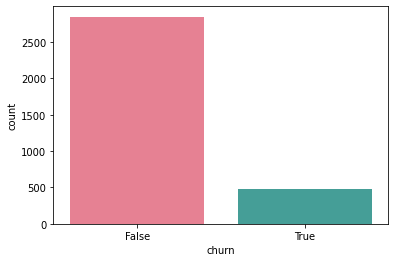

In [7]:
#import relevant library
import seaborn as sns

#generate a plot for churn counts
sns.countplot(data = df, palette = "husl", x = "churn", legend = False, hue = "churn");

In [8]:
#evaluate counts for target variable
df["churn"].value_counts()

False    2850
True      483
Name: churn, dtype: int64

It is evident that the we have a larger count one class that the other and the difference is huge indicating data imbalance hence we need to choose a good metric for evaluating perfomance of the model.

>##### (ii) Various categorical distributions : State, International plan and Voice mail plan
Create a function to plot various categorical features with respect to their value counts 

In [9]:
import matplotlib.pyplot as plt
def categorical_distribution_plot(data, feature):
    plt.figure(figsize = (18,5))
    sorted_categories = data[feature].value_counts().index
    sns.countplot(x = feature, data = data, palette = "deep", hue = feature,
                  order = sorted_categories) 
    plt.title(f"{feature} distribution")
    plt.show

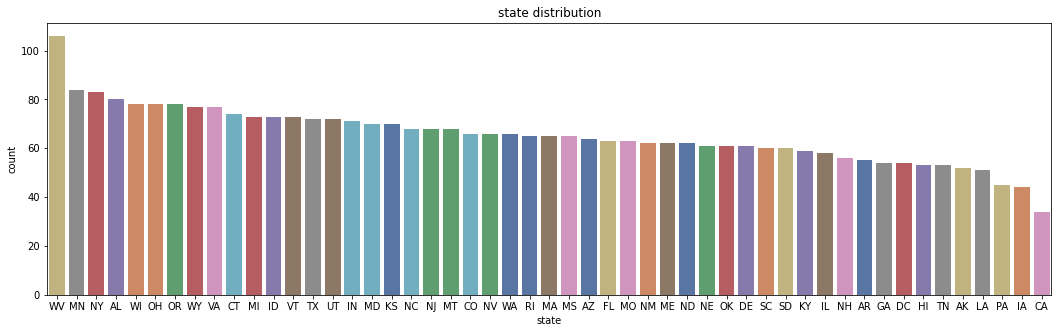

In [10]:
categorical_distribution_plot(df, "state")

It is evident that most customers are from West Virginia, Minesota, New York, Alabama and Wisconsin

no     3010
yes     323
Name: international plan, dtype: int64


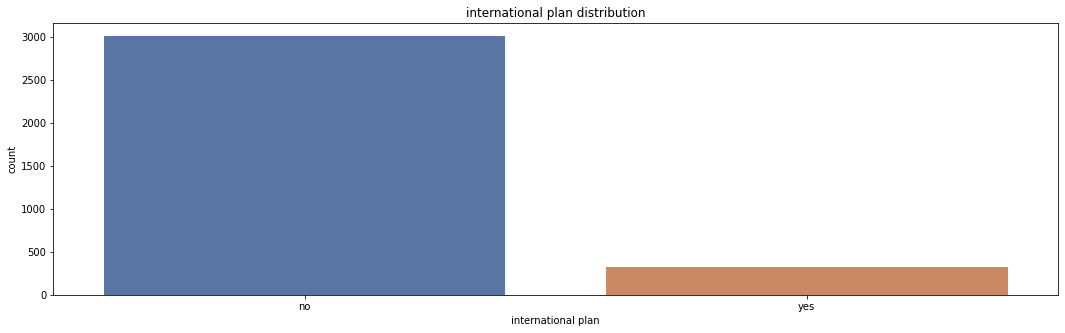

In [11]:
print(df["international plan"].value_counts())
categorical_distribution_plot(df, "international plan")

It is evident that most of the customers do not have the international plan.  
Only 323 customers are in the international plan out of 3333 customers indicating 3010 customers are NOT on the international plan

no     2411
yes     922
Name: voice mail plan, dtype: int64


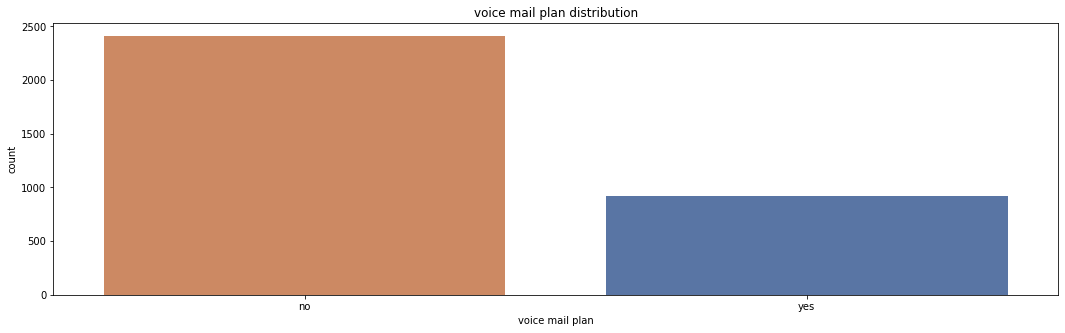

In [12]:
print(df["voice mail plan"].value_counts())
categorical_distribution_plot(df, "voice mail plan")

From the above plot it is evident that a majority of the customers are NOT on the voice mail plan.  
922 customers are on the voice mail plan and 2411 customers are NOT on the voice mail plan

>##### (iii). Numerical distributions
Plot numerical features to evaluate thier distributions.

A FacetGrid from the Seaborn library was used to create figures for each numerical feature.  
The dataset was first converted from a wide format to a long format using melting in order for the FacetGrid to be applied on the dataset.  
KDE plots and histograms were used together and both mapped to each generated figure for the numerical fearures

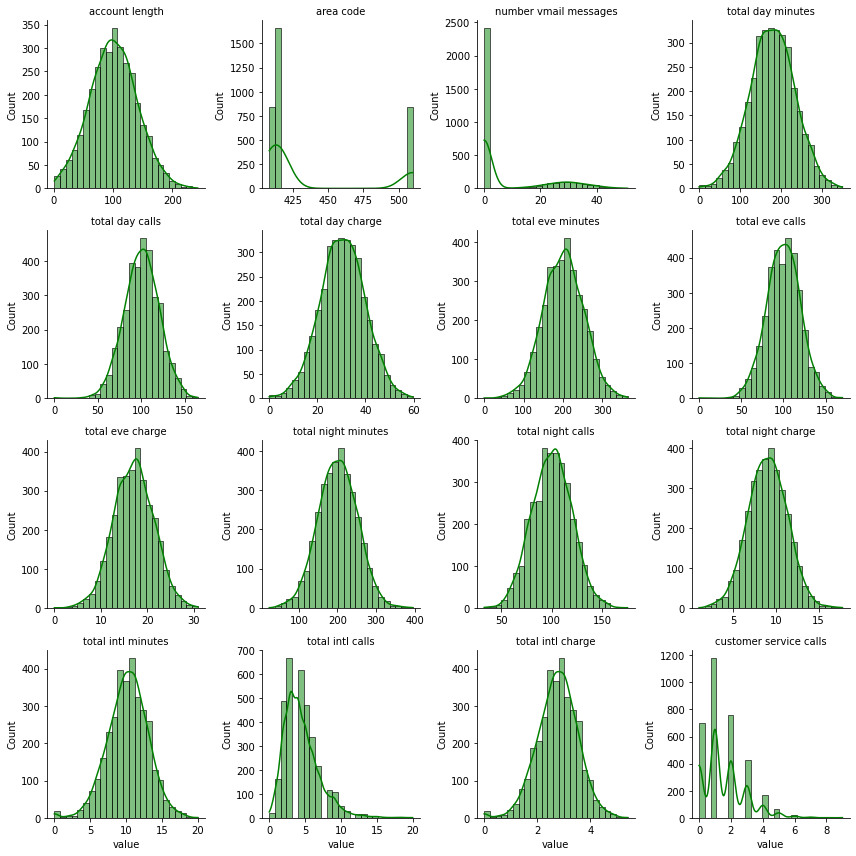

In [13]:
#melt dataframe for FacetGrid
#this sets the dataset from a wide format to a long format
#all columns are sorted into a column variable and all rows are sorted into a column variable
#each column name and single row value respectively
numerical_features_melted = df[numerical_features].melt()

#define a color palette
colors = sns.color_palette("husl", len(numerical_features))

#create a FacetGrid
#col = "variable" creates seperate plots each unique value in variable column i.e each original column
g = sns.FacetGrid(numerical_features_melted, col = "variable", col_wrap = 4, sharey = False, 
                  sharex = False)

#map histplot and kdeplot
g.map(sns.histplot, "value", kde = True, bins = 25, color = "green")

#assign titles appropriately
g.set_titles("{col_name}")

 Based on the above plots, all numerical features have Normal Distributions apart from: customer service calls and number of voice mail messages

415    1655
510     840
408     838
Name: area code, dtype: int64


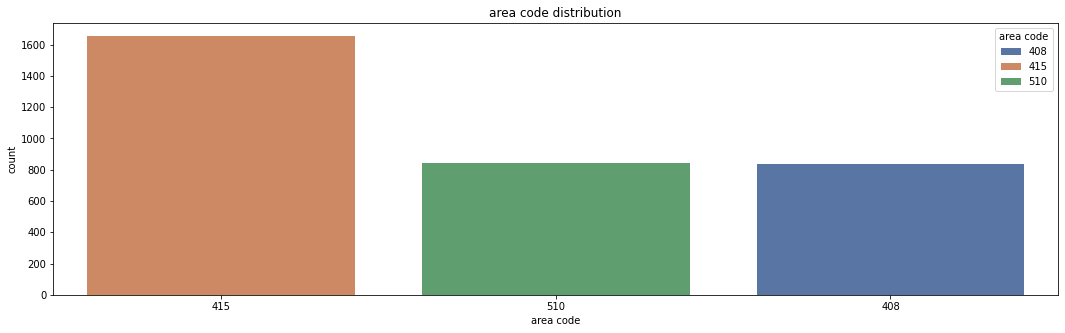

In [14]:
print(df["area code"].value_counts())
categorical_distribution_plot(df, "area code")

The Area code 415 has the most customers (1655 customers) while the Area Code 408 has the least amount of customers (838 customers).  

####  Bivariate analysis
Explore relationships between two features/variables in the dataset to evaluate how changes in one variable may cause changes in another variable.
 
 >###### Churn vs Multiple Numerical Features
 Define a function to plot kdeplots to observe the distribution of Churn against various numerical features such as charges

In [15]:
numerical_features

Index(['account length', 'area code', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls'],
      dtype='object')

In [16]:
#function to plot a kde plot
def churn_vs_numerical(data, numerical):
    plt.figure(figsize = (8,5))
    sns.kdeplot(x = numerical, data = data, palette ="hls", hue = "churn", 
                warn_singular = False, fill = True)
    plt.xlabel(f"{numerical}")
    plt.title(f"Churn vs {numerical}")
    plt.show()


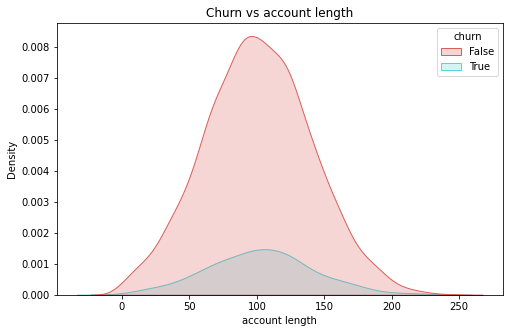

In [17]:
churn_vs_numerical(df, "account length")

> ##### CHURN VS ACCOUNT LENGTH
>> ###### Account Length does not appear to be a stron predictor of churn
There is NO CLEAR PATTERN.  
The peak account length for both groups is around 100 days.  
Churners(BLUE) have a slightly spread out distribution, but no significant deviation from non-churners(RED)

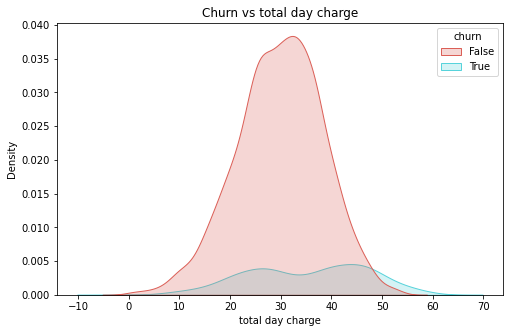

In [18]:
churn_vs_numerical(df, "total day charge")

> ##### CHURN VS TOTAL DAY CHARGE
>> ###### Customers with HIGHER TOTAL DAY CHARGES ARE MORE LIKELY TO CHURN
Non-Churned customers have a peak around 30 to 40 total day charge indicating most non-churners have this range of charges.  
Churned customers are more spread out and have a higher propotion of total day charge values above 40.  

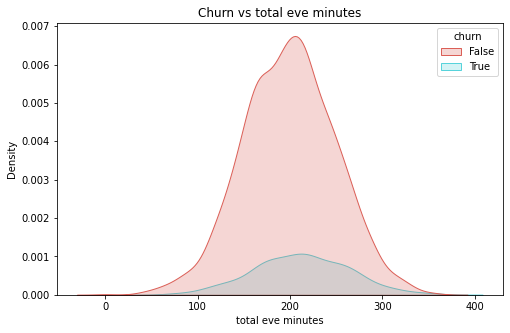

In [19]:
churn_vs_numerical(df, "total eve minutes")

> ##### CHURN VS TOTAL EVENING MINUTES
>> ###### Total evening minutes is NOT a significant churn indicator
Distribution shapes are similar as they both have peeks at around 200.  
Both churners and non-churners have a broadly overlappung distribution

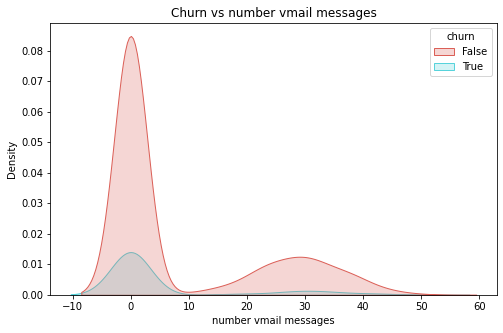

In [20]:
churn_vs_numerical(df, "number vmail messages")

> ##### CHURN VS NUMBER OF VOICEMAIL MESSAGES
>> ###### Frequent use of voicemail messages indicates LESS likelihood of churning
Churners have a much lower overall distribution than for non-churners.  
Majority of customers have 0 or very few voicemail messages.  
Non churners have a secondary peak at around 25 while churners do not.   
Churners tend to have fewer or no voicemail messages.  

Text(0.5, 1.0, 'Box plot for Churn vs Customer Service Calls')

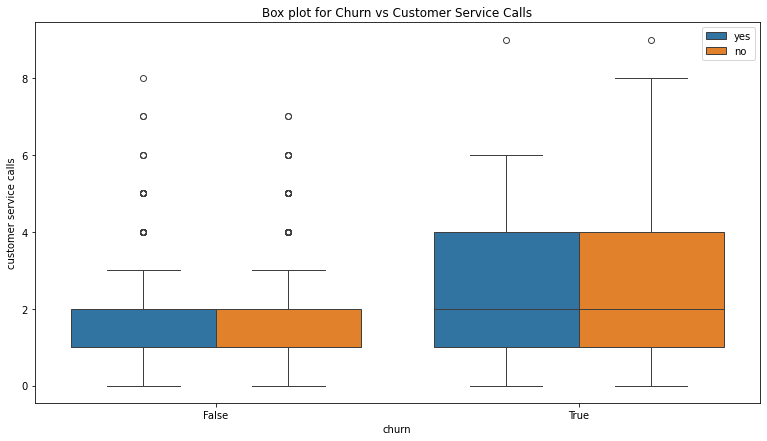

In [21]:
plt.figure(figsize = (13, 7))
sns.boxplot(data = df, x = "churn", y = "customer service calls", hue = "voice mail plan")
plt.legend(loc = "upper right")
plt.title("Box plot for Churn vs Customer Service Calls")

> ##### CHURN VS CUSTOMER SERVICE CALLS
>> ###### More customer service calls indicates higher risk of churning
Most Non-Churners have very few customer service calls i.e less than 3
Churners have a THICKER distribution with more customer service calls and are more likely to churn. 
A high call frequency for customer service may indicate dissatisfaction

#### Multivariate analysis
Create a heatmap to evaluate correlation between different variablles in the dataset

>##### Heatmap to show feature correlation

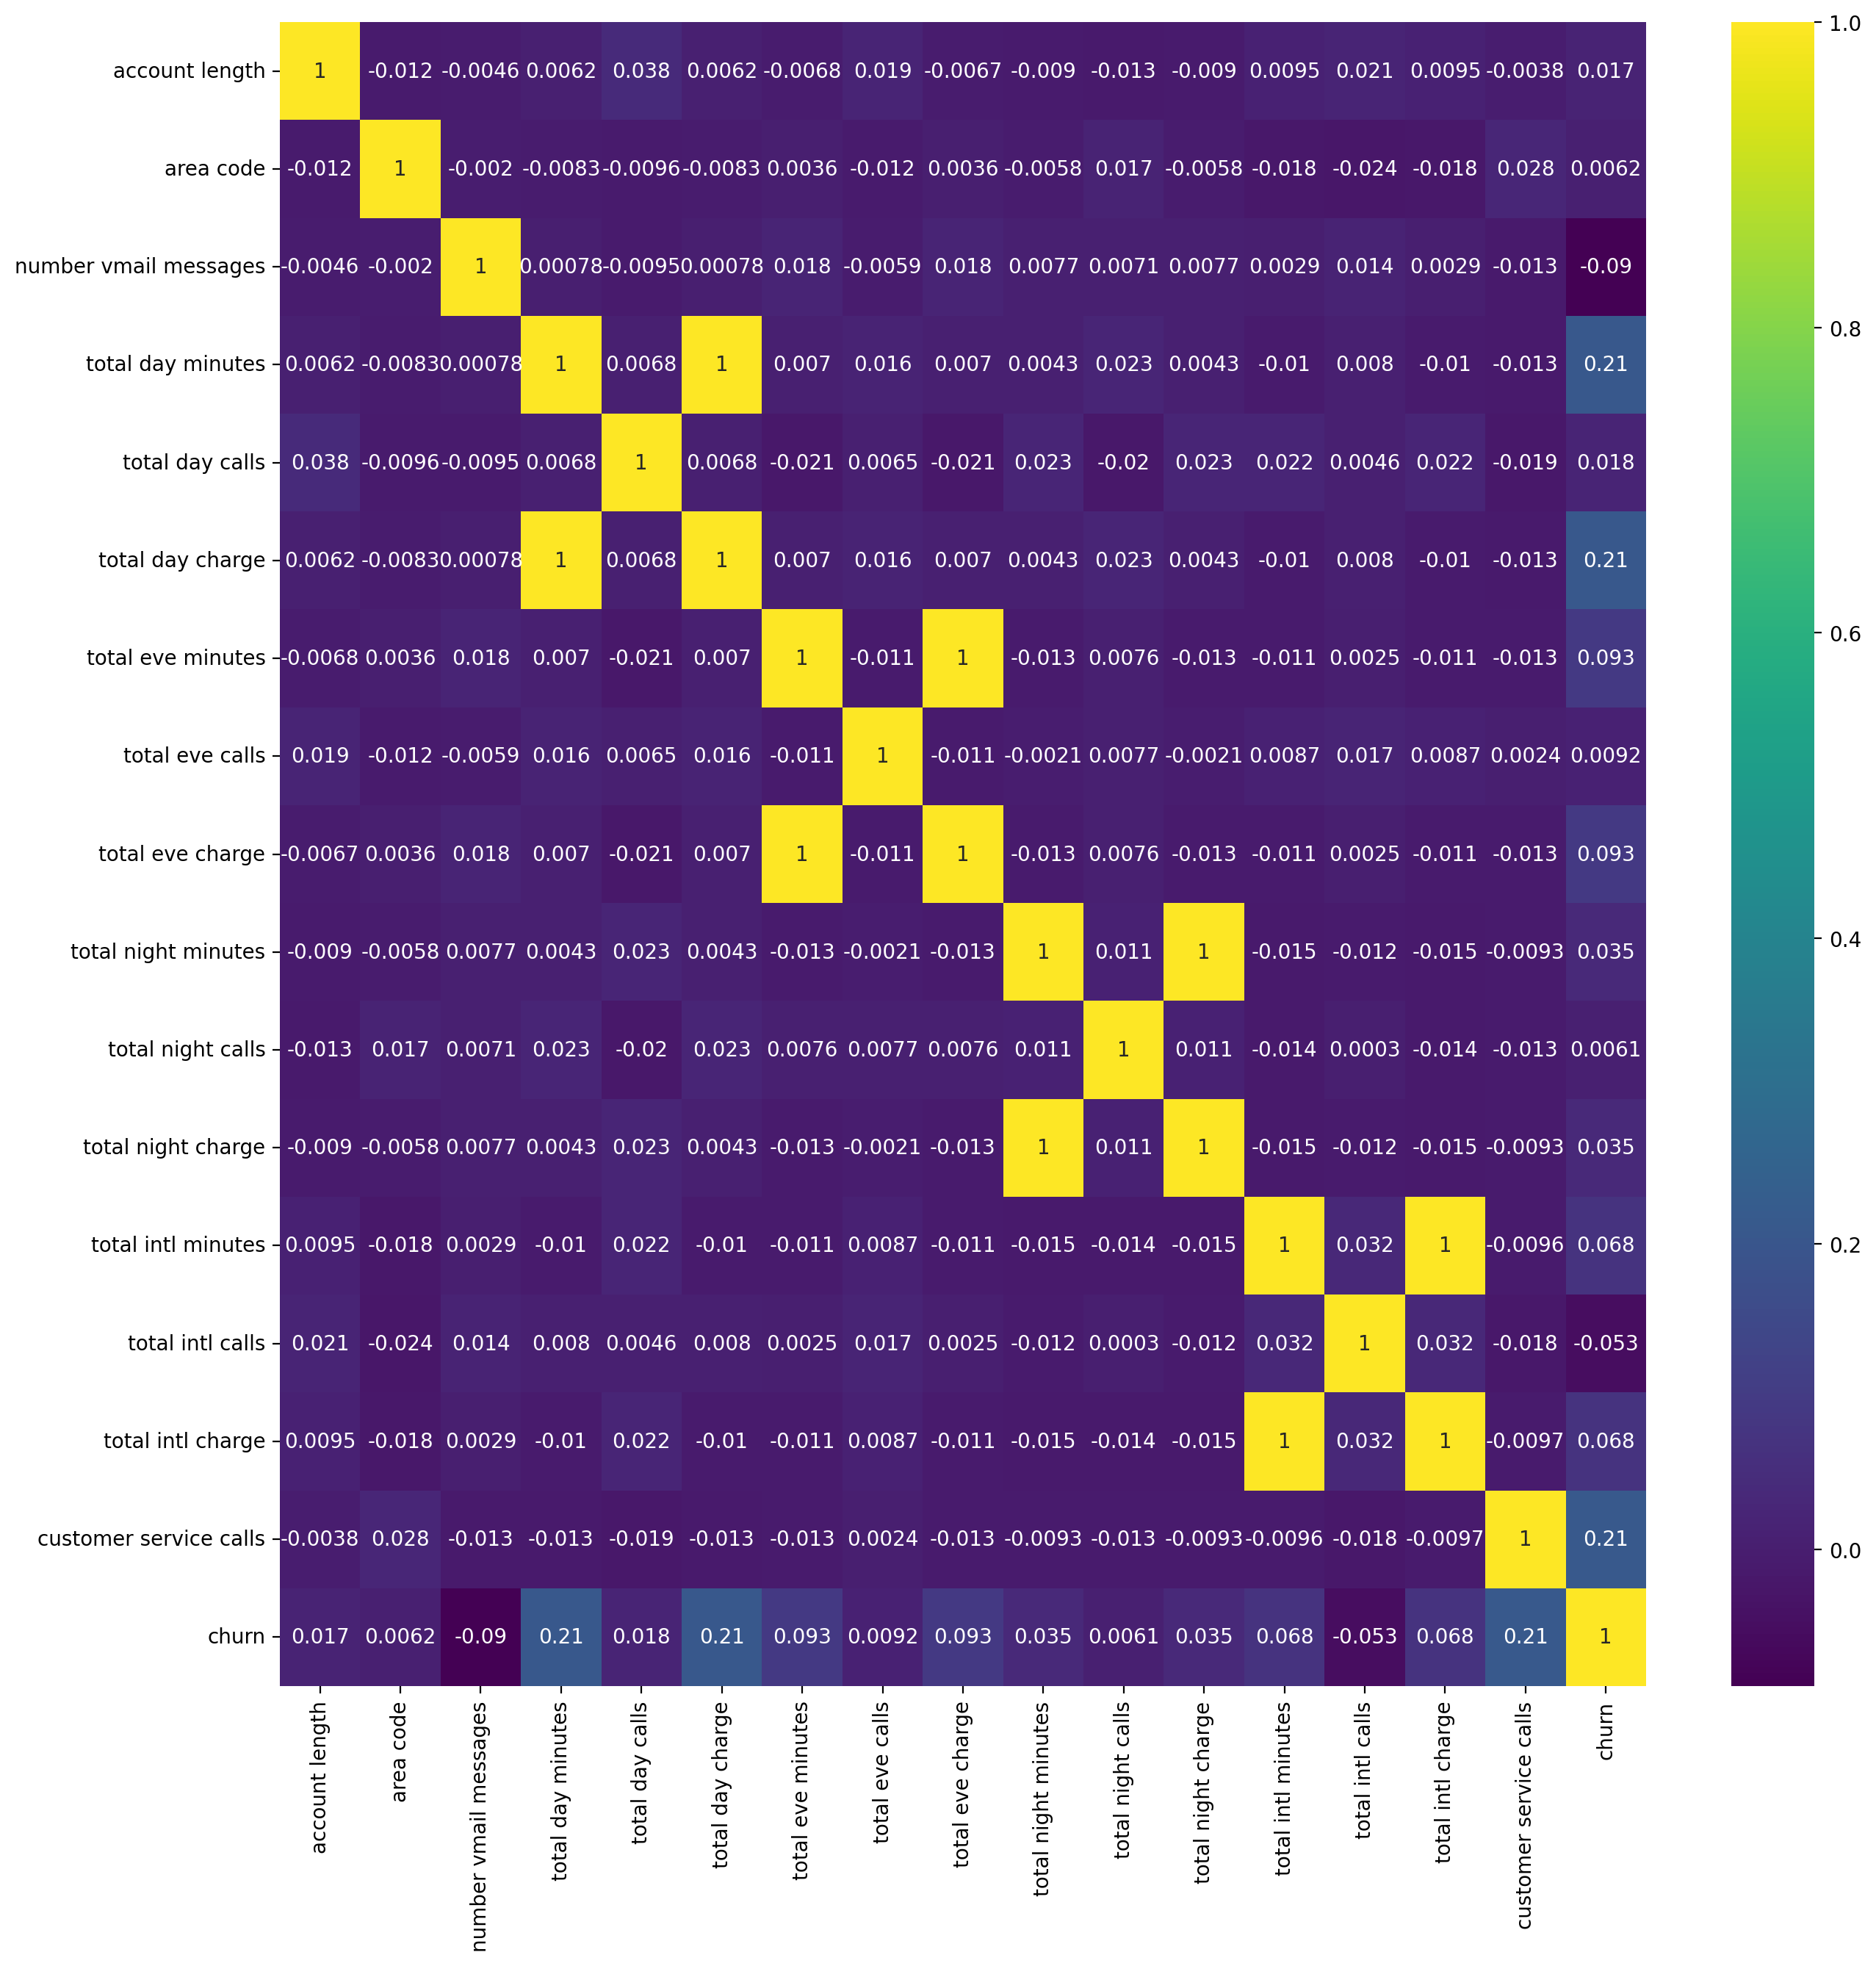

In [22]:
plt.figure(figsize = (15, 15), dpi = 200)
sns.heatmap(df.corr(),annot = True, cmap = "viridis");

Some features share a perfect correlation
 - Total day charge and total day minutes are fully positively correlated.  
 - Total eve charge and total eve minutes are fully positively correlated.  
 - Total night charge and total night minutes are fully positively correlated.  
 - Total international minutes and total international charges are fully positively correlated.  

#### Multicollinearity 
Check for multicollinearity among features. Multicollinearity refers to when 2 or more features in the dataset are highly correlated with each other causing issues such as overfitting during modelling.  
We evaluate features with high corelation values and drop them

In [23]:
import numpy as np
corr_matrix = df.corr().abs()
mask = np.triu(np.ones_like(corr_matrix, dtype = bool))
triangle_df = corr_matrix.mask(mask)

features_to_drop = [col for col in triangle_df.columns if any(triangle_df[col] > 0.90)]

df = df.drop(features_to_drop, axis = 1)


## 3. Data Preporcessing
We now prepare the data for modelling. This will include steps such as One Hot encoding or Ordinal Encoding on relevant columns. Scaling will also be carried out to have improved model accuracy.  
We will also define X and y which will be used for training and modelling.  
X and y will also be split into relevant groups i.e Train data and Test data
Irrelevant columns for our prediction such as phone number are also dropped from the dataframe

>### Ordinal Encoding
Ordinal Encoding can be used to encode categorical features to binary values of 0 and 1.  
We will ordinal encode the following features: international plan, voice mail plan and churn

In [24]:
#drop irrelevant columns for model bulding
irrelevant_cols = ["phone number", "area code", "state"]
df = df.drop(columns = irrelevant_cols)

#ordinal encode relevant categorical columns

#import relevant libraries
from sklearn.preprocessing import OrdinalEncoder

#data to be transfromed 
to_ordinal_encode = df[["international plan", "voice mail plan", "churn"]]

#instantiate transformer object
ordinal_encoder = OrdinalEncoder()

#fit object on relevant data
ordinal_encoder.fit(to_ordinal_encode)

#tranform on relevant data
ordinal_encoded = ordinal_encoder.transform(to_ordinal_encode)
df[["international plan", "voice mail plan", "churn"]] = ordinal_encoded

#evaluate encoded columns
df[["international plan", "voice mail plan", "churn"]]

international plan  voice mail plan  churn
0                    0.0              1.0    0.0
1                    0.0              1.0    0.0
2                    0.0              0.0    0.0
3                    1.0              0.0    0.0
4                    1.0              0.0    0.0
...                  ...              ...    ...
3328                 0.0              1.0    0.0
3329                 0.0              0.0    0.0
3330                 0.0              0.0    0.0
3331                 1.0              0.0    0.0
3332                 0.0              1.0    0.0

[3333 rows x 3 columns]

>### Define X and y.
We seperate the features from the labels into 2 objects, X and y

In [25]:
y = df["churn"]
X = df.drop("churn", axis = 1)

>### Split the data
We perform train test split to split the dataset into 2, with a test size of 15% and random state of 107

In [26]:
print(df.dtypes)

account length              int64
international plan        float64
voice mail plan           float64
number vmail messages       int64
total day calls             int64
total day charge          float64
total eve calls             int64
total eve charge          float64
total night calls           int64
total night charge        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                     float64
dtype: object


In [27]:
df.head()

account length  international plan  voice mail plan  number vmail messages  \
0             128                 0.0              1.0                     25   
1             107                 0.0              1.0                     26   
2             137                 0.0              0.0                      0   
3              84                 1.0              0.0                      0   
4              75                 1.0              0.0                      0   

   total day calls  total day charge  total eve calls  total eve charge  \
0              110             45.07               99             16.78   
1              123             27.47              103             16.62   
2              114             41.38              110             10.30   
3               71             50.90               88              5.26   
4              113             28.34              122             12.61   

   total night calls  total night charge  total intl calls  total intl charge  \
0                 91               11.01                 3               2.70   
1                103               11.45                 3               3.70   
2                104                7.32                 5               3.29   
3                 89                8.86                 7               1.78   
4                121                8.41                 3               2.73   

   customer service calls  churn  
0                       1    0.0  
1                       1    0.0  
2                       0    0.0  
3                       2    0.0  
4                       3    0.0

In [28]:
print(X.dtypes.value_counts())  # Should NOT include 'object'

int64      7
float64    6
dtype: int64


In [29]:
#import relevant library 
from sklearn.model_selection import train_test_split

#split the data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.15, random_state = 107)

#evaluate splits
len(X_train), len(X_test)

(2833, 500)

In [30]:
print(X_train.dtypes)

account length              int64
international plan        float64
voice mail plan           float64
number vmail messages       int64
total day calls             int64
total day charge          float64
total eve calls             int64
total eve charge          float64
total night calls           int64
total night charge        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
dtype: object


>### Scale the Data
Scaling the data is necessary to transform numerical features to a reasonable range by helping reduce effects of outliers and standardizing the variable.  
A common method of scaling is Min-Max Normalization, which scales the variables to a specific range.  
Min-Max normalization scales the minimum variable to 0 and the maximum variable is transformed to 1.  
The rest of the variables are scaled in between the range 0 and 1 appropriately

In [31]:
#import relevant library
from sklearn.preprocessing import MinMaxScaler

#select numerical columns only
numeric_features_to_scale = df.select_dtypes(include = ["float64", "int64"]).columns

#instantiate transformer object
scaler = MinMaxScaler()

#fit and transform applying back to the same numerical column names
df[numeric_features_to_scale] = scaler.fit_transform(df[numeric_features_to_scale])
df.head()

account length  international plan  voice mail plan  number vmail messages  \
0        0.524793                 0.0              1.0               0.490196   
1        0.438017                 0.0              1.0               0.509804   
2        0.561983                 0.0              0.0               0.000000   
3        0.342975                 1.0              0.0               0.000000   
4        0.305785                 1.0              0.0               0.000000   

   total day calls  total day charge  total eve calls  total eve charge  \
0         0.666667          0.755701         0.582353          0.542866   
1         0.745455          0.460597         0.605882          0.537690   
2         0.690909          0.693830         0.647059          0.333225   
3         0.430303          0.853454         0.517647          0.170171   
4         0.684848          0.475184         0.717647          0.407959   

   total night calls  total night charge  total intl calls  total intl charge  \
0           0.408451            0.595935              0.15           0.500000   
1           0.492958            0.622236              0.15           0.685185   
2           0.500000            0.375374              0.25           0.609259   
3           0.394366            0.467424              0.35           0.329630   
4           0.619718            0.440526              0.15           0.505556   

   customer service calls  churn  
0                0.111111    0.0  
1                0.111111    0.0  
2                0.000000    0.0  
3                0.222222    0.0  
4                0.333333    0.0

### Recall: Univariate analysis - Churn Distribution
We evaluated the target's distribution with respect to its value counts.  
Applying .value_counts() on the target variable revealed that there is a class imbalance.  
In order to deal with class imbalance, we use Class Weights to solve the class imbalance issue.

>#### Adjust Class weights
Solve class imbalance problems using Class Weights

## 4. Modelling
Our task is to build a model that will predict churn, our target variable.  
We use different classification algorithms to build a model that best predicts customer churn using the rest of the features in out dataset.  
We will use various classification algorithms such as:
 - Logistic Regression.  
 - Decision Tree.
 - Random Forest. 
 - XGBoost
 
 
>##### Logistic Regression
We first buld a baseline model using Logistic Regression.  
Logistic regression is a statistical model useful for binary classification.  
The target/dependant variable should be binary, just as is our case for churn

In [32]:
#import  relevant library
from sklearn.linear_model import LogisticRegression

#Instatiate baseline model
baseline_logmodel = LogisticRegression(random_state = 42, class_weight = "balanced", max_iter = 1000)

#fit baseline model on training data
baseline_logmodel.fit(X_train, y_train)

#predict on test set
y_pred_baseline_logmodel = baseline_logmodel.predict(X_test)

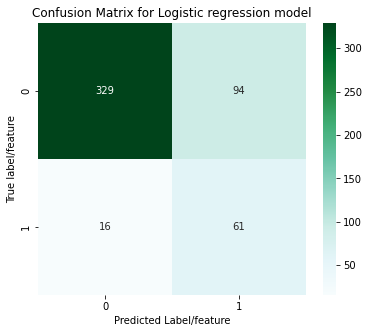

In [33]:
#import relevant library
from sklearn.metrics import confusion_matrix, classification_report

#compute a confusion matrix with (y true values, y predicted values)
cm = confusion_matrix(y_test, y_pred_baseline_logmodel)

#plot a confusion matrix
plt.figure(figsize = (6,5))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = "BuGn")

#labels and title
plt.xlabel("Predicted Label/feature")
plt.ylabel("True label/feature")
plt.title("Confusion Matrix for Logistic regression model")

#show the plot
plt.show()

In [34]:
#Evaluate accuracy score for Baseline model

#import relevant library
from sklearn.metrics import accuracy_score

#obtain accuracy score
baseline_logmodel_accuracy = accuracy_score(y_pred_baseline_logmodel, y_test)
print(f"Accuracy of Baseline Logistic regression : {baseline_logmodel_accuracy * 100}%")

Accuracy of Baseline Logistic regression : 78.0%


In [35]:
#print classification report
print(classification_report(y_test, y_pred_baseline_logmodel))

              precision    recall  f1-score   support

         0.0       0.95      0.78      0.86       423
         1.0       0.39      0.79      0.53        77

    accuracy                           0.78       500
   macro avg       0.67      0.78      0.69       500
weighted avg       0.87      0.78      0.81       500



>##### Interpretation
 - A precision of 0.95 for non-churners indicates the model is correct 95% of the time detecting class 0, hence quite efficient for class 0
 - The model is not efficent at detecting churners(class 1) due to a 0.39 precision indicating it is correct 39% of the time detecting class 1
 - The model correctly identifies 78% of class 0 since recall is 0.78 
 - The model correctly identifies 79% of class 1 since recall is 0.79. This also indicates that it captures most churners but has a low precision indicating many false values
 - The model accurately predicts the class in 78% of all cases since accuracy is 0.78 which is equivalent to 78%
 - The model is good at detecting non-churners(class 0) but poor at correctly predicting churners(class 1)
 
 Based on this we can improve the model or try a different model such as Decision Trees followed by Random Forest

>##### Decision Tree
A supervised M.L algorithm used for classification and regression tasks. It splits the dataset into branches based on feature values such as high phone charges or high number of minutes used on the device.  
This algorithm will split the data into such nodes based on the features present and make appropriate decisions similar to how a pseudo code opertates

In [36]:
#import relevant library
from sklearn.tree import DecisionTreeClassifier

#initialize and train the Decision Tree
decision_tree = DecisionTreeClassifier(criterion = 'gini', max_depth = 7, random_state = 42, class_weight = "balanced")
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=7, random_state=42)

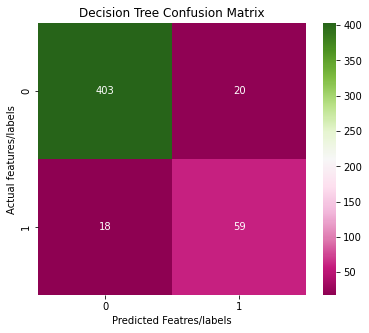

In [37]:
#make predictions
y_decision_tree_pred = decision_tree.predict(X_test)

#evaluate the Decision Tree model using a confusion matrix
decision_tree_cm = confusion_matrix(y_test, y_decision_tree_pred)
plt.figure(figsize = (6,5))
sns.heatmap(decision_tree_cm, annot = True, fmt = "d", cmap = "PiYG")
plt.xlabel("Predicted Featres/labels")
plt.ylabel("Actual features/labels")
plt.title("Decision Tree Confusion Matrix")
plt.show()

In [38]:
#Evaluate accuracy score for Decision Tree model

#obtain accuracy score
decision_tree_model_accuracy = accuracy_score(y_decision_tree_pred, y_test)
print(f"Accuracy of Decision Tree :{decision_tree_model_accuracy * 100}%")

Accuracy of Decision Tree :92.4%


In [39]:
print(classification_report(y_test, y_decision_tree_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.95      0.95       423
         1.0       0.75      0.77      0.76        77

    accuracy                           0.92       500
   macro avg       0.85      0.86      0.86       500
weighted avg       0.92      0.92      0.92       500




>##### Interpretation
 - With a precision of 0.96  for class 0 the model detects non-churners correctly 96% of the time
 - A precision of 0.75 for churners(class 1) shows that the model detects class 1 correctly 75% of the time. 
 - The model correctly identifies 95% of class 0 since recall is 0.95  
 - The model correctly identifies 77% of class 1 since recall is 0.77. 
 - The model correctly predicts the class in 92% of all cases since accuracy is 0.92 which is equivalent to 92%
 - The model seems good generally bt we can improve the recall for class 1
 
 Based on this we can improve the model or try a different model such as Random Forest and see if we can improve our classs 1 recall value

>###### Random Forest
These are basically multiple decision trees where samples are collected with replacement for training each decision tree. Each decision tree predicts an output and the most popular output is voted as the final prediction.  
This imporves accuracy, redices overfitting and created a better model than a single Decision Tree

In [40]:
#import the necessary library
from sklearn.ensemble import RandomForestClassifier

#initialize and train the model
random_forest = RandomForestClassifier(n_estimators = 100, random_state = 42, 
                        class_weight = "balanced", max_depth = 10, min_samples_split = 10)
random_forest.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_split=10, random_state=42)

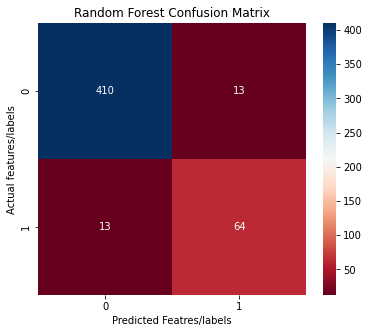

In [41]:
#make predicitons and generate a confusion matrix
y_random_forest_pred = random_forest.predict(X_test)

#confusion matrix
random_forest_cm = confusion_matrix(y_test, y_random_forest_pred)
plt.figure(figsize = (6,5))
sns.heatmap(random_forest_cm, annot = True, fmt = "d", cmap = "RdBu")
plt.xlabel("Predicted Featres/labels")
plt.ylabel("Actual features/labels")
plt.title("Random Forest Confusion Matrix")
plt.show()

In [42]:
#Evaluate accuracy score for Decision Tree model

#obtain accuracy score
random_forest_model_accuracy = accuracy_score(y_random_forest_pred, y_test)
print(f"Accuracy of Random Forest model :{random_forest_model_accuracy * 100}%")

Accuracy of Random Forest model :94.8%


In [43]:
print(classification_report(y_test, y_random_forest_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97       423
         1.0       0.83      0.83      0.83        77

    accuracy                           0.95       500
   macro avg       0.90      0.90      0.90       500
weighted avg       0.95      0.95      0.95       500



>#### Interpretaion
 - The model is efficient at detecting class 0 since we have 97% precision, indicating it is correct 97% of the time detecting class 0
 - The model is better at detecting churners(class 1) compared to the Decision Tree model. We have an improved precision rate of 83% from 75% precision
 - The model correctly identifies 97% of class 0 since recall is 0.97
 - The model correctly identifies 83% of class 1 since recall is 0.83. This is higher as compared to Decision tree model which had a recall of 0.77
 - The model correctly predicts the class on 95% of all cases since accuracy is 0.95 equivalent to 95%

We can improve the model further or try a different model such as XGBoost

>##### XGboost (Extreme gradient Boosting)
A M.L algorithm based on gradient boosting which builds multiple weak decision trees sequentially, where each new tree corrects the errors of the previous trees.  
Includes regularization like Liasso and Ridge to prevent overfitting

In [44]:
#Import relevant libraries
import xgboost as xgb

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

#instantiate and train the model
xgboost_model = xgb.XGBClassifier(random_state = 42, 
                                  scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1]))
xgboost_model.fit(X_train, y_train)

C:\Users\user\anaconda3\envs\learn-env\lib\site-packages\xgboost\compat.py:93: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=5.977832512315271,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

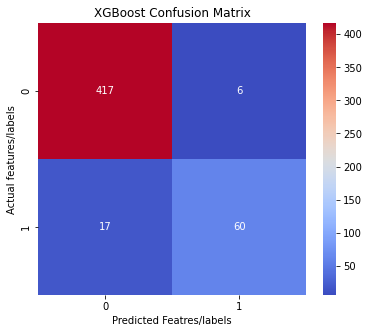

In [45]:
#make predictions and generate a confusion matrix
xgboost_model_pred = xgboost_model.predict(X_test)

#confusion matrix
xgboost_cm = confusion_matrix(y_test, xgboost_model_pred)
plt.figure(figsize = (6,5))
sns.heatmap(xgboost_cm, annot = True, fmt = "d", cmap = "coolwarm")
plt.xlabel("Predicted Featres/labels")
plt.ylabel("Actual features/labels")
plt.title("XGBoost Confusion Matrix")
plt.show()

In [46]:
#Evaluate accuracy score for Decision Tree model

#obtain accuracy score
xgboost_model_accuracy = accuracy_score(xgboost_model_pred, y_test)
print(f"Accuracy of XGBoost model :{xgboost_model_accuracy * 100}%")

Accuracy of XGBoost model :95.39999999999999%


In [47]:
print(classification_report(y_test, xgboost_model_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97       423
         1.0       0.91      0.78      0.84        77

    accuracy                           0.95       500
   macro avg       0.93      0.88      0.91       500
weighted avg       0.95      0.95      0.95       500



>#### Interpretaion
 - The model is better at detecting class 0 since we have 96% precision, indicating it is correct 96% of the time detecting class.
 - This model is the best at detecting churners(class 1) compared to the rest of the models. We have the best precision rate at 91%
 - The model correctly identifies 99% of class 0 since recall is 0.99.(Best so far)
 - The model correctly identifies 78% of class 0 since recall is 0.78. This is LOWER as compared to the random forest which had a recall of 0.83
 - The model correctly predicts the class on 95% of all cases since accuracy is 0.95  

## 5.Model Evaluation
We evaluate the model's performance using the ROC and AUC curves.    
ROC Curve(Receiver-operating Characteristic curve) is a visual representation of model performance across all threshholds
AUC Curve(Area under the ROC curve) represents the probability that the model will rank the positive higher than the negative if given a randomly chosen posititve and negative example.  
A perfect model has an AUC of 1.0  
We will plot an ROC of all our models. The Baseline model will still be Logistic Regression

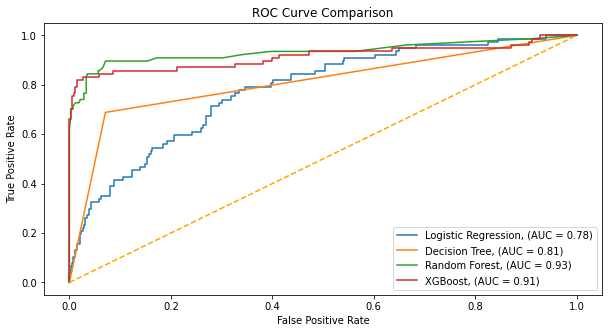

In [48]:
#import relevant libraries
from sklearn.metrics import roc_curve, roc_auc_score

#define classifiers
classifiers = {"Logistic Regression" : LogisticRegression(),
              "Decision Tree" : DecisionTreeClassifier(),
              "Random Forest" : RandomForestClassifier(),
              "XGBoost" : xgb.XGBClassifier()
              }
              

#define your figure to plot in trained models
plt.figure(figsize = (10,5))

#train models
for name, classifier in classifiers.items():
    #fit each classifier and generate predicted values
    classifier.fit(X_train, y_train)
    
    #compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, classifier.predict_proba(X_test)[:, 1])
    auc = roc_auc_score(y_test, classifier.predict_proba(X_test)[:, 1])
    plt.plot(fpr, tpr, label = f"{name}, (AUC = {auc:.2f})")
#plot reference line(Baseline Model)
plt.plot([0,1], [0,1], linestyle = "--", color = "orange")

#titles and labels
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc = "lower right")

#show plot
plt.show()

##### ROC-AUC Curve Interpretation
The closer the curve hugs the y-axis/the closer the curve is to the top_left corner , the better the model is at distinguishing between the classes.

 - XGBoost(AUC = 0.91)  
    -  Best overall classification ability indicating that in 91% of the cases, the model will rank a randomly chosen positive instance hiogher than a randomly chosen negative instance
 
 - Logistic Regression(AUC = 0.78)  
     - Close but lower than XGBoost. An AUC of 0.91 indicates it is a strong classifer but less effective than XGboost
 
 - Random Forest(AUC = 0.93)   
    -  Captures patterns but not as effectively as XGBoost and is better than Logistic and Decision Tree
 
 - Decision Tree(AUC = 0.82)   
    - Least overall classification among our 4 models ability indicating that in 82% of the cases, it has a higher false positive rate and is lss reliable than others
 - Baseline(Orange Dashed Line)  
    - Represents a random clasiffier with AUC = 0.50 and any model performing below this line is worse than random guessing

### Hyperparameter tuning
Involves evaluating the models further by exploring various hyperparameters that influence model performance and tuning various parameters for enhanced accuracy and reliability.  
I decided to tune 3 models i.e Logistic Regression, Random Forest and XGBoost

> ### Logistic Regression
We use GridSearchCV for optimizing the model.  
This is a Method provided by the scikit learn Library where we pass in various parameter tunes and the method finds the best combination of hyperparamters that optimize the model BEST.  
It also uses Cross-Validation to evaluate perfomance of each combination and selects the set of hyperparameters that provide the best Cross-Validation performance.  

In [49]:
#baseline_logmodel's accuracy
print(f"The Accuracy of baseline logistic regression without hyperparameter : {baseline_logmodel_accuracy * 100}%")

The Accuracy of baseline logistic regression without hyperparameter : 78.0%


In [50]:
#define various hyperparameters to be used in logistic regression
baseline_logmodel_parameters = [{
    "penalty" : ["l1", "l2", "elasticnet", "None"],
    "C" : [0.01, 0.1, 1, 10],
    "solver" : ["lbfgs", "liblinear","sag and saga"],
    "max_iter" : [1000, 2000, 3000, 4000, 5000]
    }]

#import relevant library : GridSearchCV
from sklearn.model_selection import GridSearchCV

#total hyperparameters to be chosen
logisitc_parameters = GridSearchCV(baseline_logmodel, param_grid = baseline_logmodel_parameters,
                                       cv = 5, n_jobs = 1)
logisitc_parameters

GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=1000, random_state=42),
             n_jobs=1,
             param_grid=[{'C': [0.01, 0.1, 1, 10],
                          'max_iter': [1000, 2000, 3000, 4000, 5000],
                          'penalty': ['l1', 'l2', 'elasticnet', 'None'],
                          'solver': ['lbfgs', 'liblinear', 'sag and saga']}])

In [51]:
#apply best Hyperparameters to Logistic Regression
logisitc_best_parameters = logisitc_parameters.fit(X, y)
#logisitc_best_parameters.best_estimator_

#evaluate best parameters chosen
logisitc_best_parameters.best_params_

{'C': 10, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}

In [52]:
#evaluate tuned model's score
logisitc_best_parameters.best_score_

0.77168082625354

>> ##### Evaluate tuned Logistic model

In [53]:
#baseline_logmodel's accuracy
print(f"The Accuracy of baselne logistic regression WITHOUT hyperparameter tuning : {baseline_logmodel_accuracy * 100}%")

#tuned baseline_logmodel's accuracy
print(f"The Accuracy of baselne logistic regression WITH hyperparameter tuning :{logisitc_best_parameters.score(X_test, y_test) * 100}%")

The Accuracy of baselne logistic regression WITHOUT hyperparameter tuning : 78.0%
The Accuracy of baselne logistic regression WITH hyperparameter tuning :78.4%


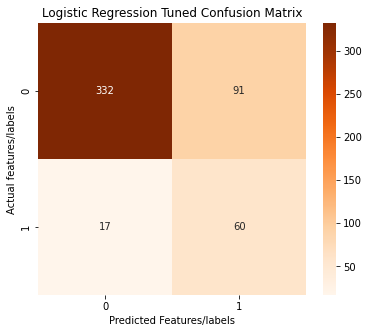

In [54]:
#make predictions for tuned Logistic Regression model
y_pred_logisitc_best_parameters = logisitc_best_parameters.predict(X_test)

#confusion matrix for tuned Logistic Regression model
logistic_tuned_cm = confusion_matrix(y_test, y_pred_logisitc_best_parameters)
plt.figure(figsize = (6,5))
sns.heatmap(logistic_tuned_cm, annot = True, fmt = "d", cmap = "Oranges")
plt.xlabel("Predicted Features/labels")
plt.ylabel("Actual features/labels")
plt.title("Logistic Regression Tuned Confusion Matrix")
plt.show()

In [55]:
print(classification_report(y_test, y_pred_logisitc_best_parameters ))

              precision    recall  f1-score   support

         0.0       0.95      0.78      0.86       423
         1.0       0.40      0.78      0.53        77

    accuracy                           0.78       500
   macro avg       0.67      0.78      0.69       500
weighted avg       0.87      0.78      0.81       500



>### Random Forest

In [56]:
#Original Random Forest Model accuracy
print(f"The Accuracy of original Random Forest model WITHOUT hyperparameter : {random_forest_model_accuracy * 100}%")

The Accuracy of original Random Forest model WITHOUT hyperparameter : 94.8%


In [57]:
#import relevant libraries
from sklearn.model_selection import RandomizedSearchCV

#define various hyperparameters to be used in tuning of random forest model
random_forest_parameters = {
    "n_estimators" : [100, 150, 200],
    "max_features" : ["sqrt", "log2", None],
    "max_depth" : [10, 15, None],
    "min_samples_split" : [5, 10, 20],
    "min_samples_leaf" : [2, 5, 7],
    "class_weight" : ["balanced", None]
    }

#total hyperparameters to be chosen
random_forest_parameters = RandomizedSearchCV(random_forest, random_forest_parameters, random_state = 42,
                                       cv = 3, n_jobs = 1)
random_forest_parameters

RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    max_depth=10,
                                                    min_samples_split=10,
                                                    random_state=42),
                   n_jobs=1,
                   param_distributions={'class_weight': ['balanced', None],
                                        'max_depth': [10, 15, None],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [2, 5, 7],
                                        'min_samples_split': [5, 10, 20],
                                        'n_estimators': [100, 150, 200]},
                   random_state=42)

In [58]:
#apply best Hyperparameters to Random Forest
random_forest_best_parameters = random_forest_parameters.fit(X, y)
#random_forest_best_parameters.best_estimator_

#evaluate best parameters chosen
random_forest_best_parameters.best_params_

{'n_estimators': 100,
 'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_features': None,
 'max_depth': None,
 'class_weight': 'balanced'}

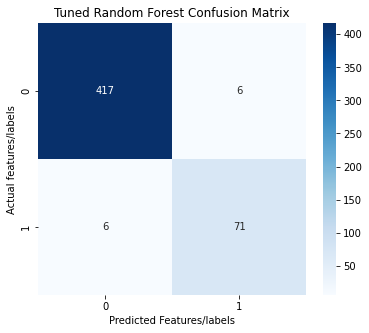

In [59]:
#make predictions for tuned Logistic Regression model
y_pred_random_forest_best_parameters = random_forest_best_parameters.predict(X_test)

#confusion matrix for tuned Logistic Regression model
random_forest_tuned_cm = confusion_matrix(y_test, y_pred_random_forest_best_parameters)
plt.figure(figsize = (6,5))
sns.heatmap(random_forest_tuned_cm, annot = True, fmt = "d", cmap = "Blues")
plt.xlabel("Predicted Features/labels")
plt.ylabel("Actual features/labels")
plt.title("Tuned Random Forest Confusion Matrix")
plt.show()

In [60]:
print(classification_report(y_test, y_pred_random_forest_best_parameters))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       423
         1.0       0.92      0.92      0.92        77

    accuracy                           0.98       500
   macro avg       0.95      0.95      0.95       500
weighted avg       0.98      0.98      0.98       500



#### Could we be Overfitting?
Perform the following tests below to check for overfitting:
 - Train vs test Perfomance
 - Cross-Validation Score

In [61]:
#Train vs test Perfomance
from sklearn.metrics import roc_auc_score

train_auc = roc_auc_score(y_train, random_forest_best_parameters.predict_proba(X_train)[:, 1])
test_auc = roc_auc_score(y_test, random_forest_best_parameters.predict_proba(X_test)[:, 1])

print(f"Train AUC: {train_auc:.4f}")
print(f"Test AUC: {test_auc:.4f}")


Train AUC: 0.9972
Test AUC: 0.9979


The train-test AUC is very close which is a good indicator however, we also check for CV AUC

In [62]:
#Cross-Validation Score
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(random_forest_best_parameters, X_train, y_train, cv=5, scoring="roc_auc", n_jobs = -1)
print(f"Cross-validation AUC: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")


Cross-validation AUC: 0.9083 ± 0.0154


The CV AUC is lower than the train-test AUC indicating SLIGHT OVERFITTING

##### CONCLUSION
The model is highly accurate but SLIGHTLY OVERFITTING.  
Test AUC and CV AUC need to be closer in order for the model to be more generalizable. 

> ### XGBoost
Apply GridSearchCV to obtain best parameters 

In [63]:
#Original XGBoost accuracy
print(f"The Accuracy of original XGBoost model WITHOUT hyperparameter : {xgboost_model_accuracy * 100}%")

The Accuracy of original XGBoost model WITHOUT hyperparameter : 95.39999999999999%


In [64]:
xgboost_model_parameters = {
    "max_depth" : [3, 5, 7, 9, 10],
    "learning_rate" : [0.1, 0.01, 0.001],
    "subsampe" : [0.5, 0.7, 0.9, 1]
}

xgboost_parameters = GridSearchCV(xgboost_model, param_grid = xgboost_model_parameters,
                                  cv = 5, scoring = 'roc_auc')
xgboost_parameters

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=0,
                                     num_parallel_tree=1, random_state=42,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=5.977832512315271,
                                     subsample=1, tree_method='exact',
                                     validate_parameters=1, verbosity=None),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 7, 9, 10],
                         'subsampe': [0.5, 0.7, 0.9, 1]},
             scoring='roc_auc')

In [65]:
xgboost_best_parameters = xgboost_parameters.fit(X, y)
#xgboost_best_parameters.best_estimator_
#xgboost_best_parameters.best_params_

[21:13:22] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { subsampe } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:13:22] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { subsampe } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:13:22] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { subsampe } might not be used.

  This may not be accurate due to some parameters are only used in language bindi

[21:13:26] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { subsampe } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:13:26] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { subsampe } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:13:26] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { subsampe } might not be used.

  This may not be accurate due to some parameters are only used in language bindi

[21:13:31] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { subsampe } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:13:32] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { subsampe } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:13:32] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { subsampe } might not be used.

  This may not be accurate due to some parameters are only used in language bindi

[21:13:38] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { subsampe } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:13:39] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { subsampe } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:13:39] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { subsampe } might not be used.

  This may not be accurate due to some parameters are only used in language bindi

[21:13:49] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { subsampe } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:13:49] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { subsampe } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:13:49] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { subsampe } might not be used.

  This may not be accurate due to some parameters are only used in language bindi

[21:13:55] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { subsampe } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:13:55] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { subsampe } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:13:55] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { subsampe } might not be used.

  This may not be accurate due to some parameters are only used in language bindi

[21:14:00] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { subsampe } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:14:00] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { subsampe } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:14:00] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { subsampe } might not be used.

  This may not be accurate due to some parameters are only used in language bindi

[21:14:07] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { subsampe } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:14:08] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { subsampe } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:14:08] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { subsampe } might not be used.

  This may not be accurate due to some parameters are only used in language bindi

[21:14:18] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { subsampe } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:14:19] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { subsampe } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:14:19] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { subsampe } might not be used.

  This may not be accurate due to some parameters are only used in language bindi

[21:14:30] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { subsampe } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:14:30] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { subsampe } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:14:30] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { subsampe } might not be used.

  This may not be accurate due to some parameters are only used in language bindi

[21:14:34] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { subsampe } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:14:34] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { subsampe } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:14:34] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { subsampe } might not be used.

  This may not be accurate due to some parameters are only used in language bindi

[21:14:40] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { subsampe } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:14:41] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { subsampe } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:14:41] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { subsampe } might not be used.

  This may not be accurate due to some parameters are only used in language bindi

[21:14:48] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { subsampe } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:14:49] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { subsampe } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:14:49] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { subsampe } might not be used.

  This may not be accurate due to some parameters are only used in language bindi

[21:14:58] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { subsampe } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:14:58] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { subsampe } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:14:58] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { subsampe } might not be used.

  This may not be accurate due to some parameters are only used in language bindi

In [66]:
xgboost_best_parameters.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'subsampe': 0.5}

>> ##### Evaluate tuned model

In [67]:
#Original XGBoost accuracy
print(f"The Accuracy of original XGBoost model WITHOUT hyperparameter : {xgboost_model_accuracy * 100}%")

#tuned XGBoost accuracy
print(f"The Accuracy of tuned XGBoost model WITH hyperparameter : {xgboost_best_parameters.score(X_test, y_test) * 100}")

The Accuracy of original XGBoost model WITHOUT hyperparameter : 95.39999999999999%
The Accuracy of tuned XGBoost model WITH hyperparameter : 99.92324460409566


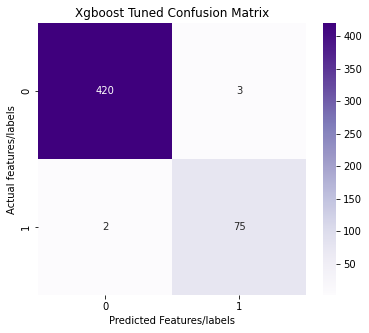

In [68]:
#make predictions for tuned XGBoost
y_pred_xgboost_best_parameters = xgboost_best_parameters.predict(X_test)

#confusion matrix for tuned model
xgboost_tuned_cm = confusion_matrix(y_test, y_pred_xgboost_best_parameters)
plt.figure(figsize = (6,5))
sns.heatmap(xgboost_tuned_cm, annot = True, fmt = "d", cmap = "Purples")
plt.xlabel("Predicted Features/labels")
plt.ylabel("Actual features/labels")
plt.title("Xgboost Tuned Confusion Matrix")
plt.show()

In [69]:
print(classification_report(y_test, y_pred_xgboost_best_parameters))

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99       423
         1.0       0.96      0.97      0.97        77

    accuracy                           0.99       500
   macro avg       0.98      0.98      0.98       500
weighted avg       0.99      0.99      0.99       500



In [70]:
from sklearn.metrics import roc_auc_score

train_auc = roc_auc_score(y_train, xgboost_best_parameters.predict_proba(X_train)[:, 1])
test_auc = roc_auc_score(y_test, xgboost_best_parameters.predict_proba(X_test)[:, 1])

print(f"Train AUC: {train_auc:.4f}")
print(f"Test AUC: {test_auc:.4f}")


Train AUC: 0.9983
Test AUC: 0.9992


>####  XGBoost is still the BEST model even after tuning
The tuned XGBoost model has the highest recall and F1-score compared to the tuned logistic regression model and tuned random forest

>>#### Plot ROC- AUC curves for tuned models to compare them

[21:15:05] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { subsampe } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




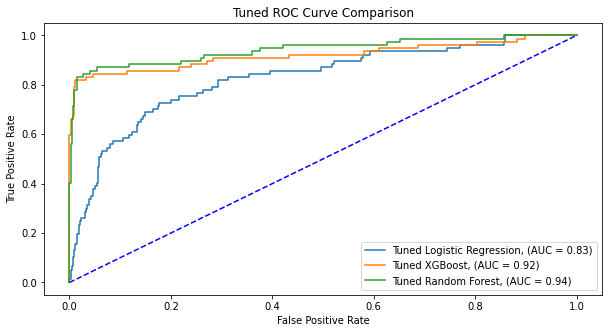

In [71]:
#use ** to unpack the dictionaries of parametrs
tuned_classifiers = {"Logistic Regression" : LogisticRegression(**logisitc_best_parameters.best_params_),
              "XGBoost" : xgb.XGBClassifier(**xgboost_best_parameters.best_params_),
              "Random Forest" : RandomForestClassifier(**random_forest_best_parameters.best_params_)
              }
              

#define your figure to plot in trained models
plt.figure(figsize = (10,5))

#train models
for name, tuned_classifier in tuned_classifiers.items():
    #fit each classifier and generate predicted values
    tuned_classifier.fit(X_train, y_train)
    
    #compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, tuned_classifier.predict_proba(X_test)[:, 1])
    auc = roc_auc_score(y_test, tuned_classifier.predict_proba(X_test)[:, 1])
    plt.plot(fpr, tpr, label = f"Tuned {name}, (AUC = {auc:.2f})")
#plot reference line
plt.plot([0,1], [0,1], linestyle = "--", color = "blue")

#titles and labels
plt.title("Tuned ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc = "lower right")

#show plot
plt.show()

##### TUNED ROC-AUC Curve Interpretation
The closer the curve hugs the y-axis/the closer the curve is to the top_left corner , the better the model is at distinguishing between the classes.

 - Tuned XGBoost(AUC = 0.92)  
    -  Good overall classification ability indicating that in 92% of the cases, the model will rank a randomly chosen positive instance higher than a randomly chosen negative instance 
 - Logistic Regression(AUC = 0.83)  
    - Lowest AUC of the three. An AUC of 0.83 which is an improvement from 0.78
 - Random Forest(AUC = 0.93)   
    - Best overall classification ability of the three but not a significant difference when compared with AUC of tuned XGBoost
    - AUC also did not change significantyly after hyperparameter tuning indicating tuning did not boost performance 
 - Baseline(Blue Dashed Line)  
    - Represents a random clasiffier with AUC = 0.50 and any model performing below this line is worse than random guessing

## 6.Conclusion
XGBoost Model is the best model to use to predict customer churn.  
To further evaluate this model we can undertake feature engineering to boost its scores further
Additionally evaluation of feature importance would also be useful to evaluate which features are the most important in predicting customer churn
Random Forest Model also showed great potential but showed signs of slight overfitting

>### Recommendations 
 - Customer service quality should be improved in order to reduce the number of customer service calls. Training programs to the customer care team can be applied to have the team provide effective solutions to issues affecting customers.
 - Discounts should be introduced as customers with higher charges are more likely to churn. Discount tactics such as discounting customers who have consistently high charges could  help reduce churn.  
 - Voicemail plans should be marketed more to try and increase the adoption of voicemail plans as frequent usage of voice mail plans shows that the customer is less likely to churn. New offers such as discounting all customers who have voice mail plans could lead to more customers adopting the voice mail plans